# Credit Rist Analysis and Prediction

The Dataset Contains the History of some set of Employees who obtained Loans from an Organisation, it also contains the column that indicates if such Employee defaults the agreement to pay back the Loan or not.

The aim of this Project is to build a model that can predict whether an Employee will Default or not, and the Model that best Suits the project is the K-Nearest Neighbor since the output is quantitative in nature.

The Column in the Dataset is as follows: Client ID, Income, Age, Loan and Default.

In [1]:
#The Analytics Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
#The Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [138]:
#The Prediction Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, classification_report, confusion_matrix

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
sns.set_style('darkgrid')

In [4]:
df = pd.read_csv('C:/Users/OlADAYO/Documents/raw_data/Credit_Risk.csv')

Having a feel of The Dataset.

In [31]:
df.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [6]:
#Checking the Data Type of Each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
clientid    2000 non-null int64
income      2000 non-null float64
age         1997 non-null float64
loan        2000 non-null float64
default     2000 non-null int64
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [33]:
#Checking for the Statistical Breakdown of the Dataset
df.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


# Cleaning The Dataset for Optimize Performance

Checking for Null Values and Treating it Accordingly.

In [8]:
df.isnull().sum().to_frame()
#Only the Age Column has Three(3) missing values

,0
clientid,0
income,0
age,3
loan,0
default,0


In [38]:
#Dropping The Rows With Missing Values
df = df.dropna(axis=0)

In [9]:
#Double Checking for Missing Values
df.isnull().sum().to_frame()

,0
clientid,0
income,0
age,3
loan,0
default,0


Converting the Age Column from Float Object to String Object

In [42]:
df['age'] = df['age'].astype('int')
df

,clientid,income,age,loan,default
0,1,66155.925095,59,8106.532131,0
1,2,34415.153966,48,6564.745018,0
2,3,57317.170063,63,8020.953296,0
3,4,42709.534201,45,6103.642260,0
4,5,66952.688845,18,8770.099235,1
5,6,24904.064140,57,15.498598,0
6,7,48430.359613,26,5722.581981,0
7,8,24500.141984,32,2971.003310,1
8,9,40654.892537,55,4755.825280,0
9,10,25075.872771,39,1409.230371,0


Rounding up the Income and Loan Columns to Two(2) Decimal Places

In [45]:
#Income
df['income'] = round(df['income'], 2)
#Loan
df['loan'] = round(df['loan'], 2)

Some Values in the Age Column are carrying Negative sign, which is out of place, so we need to get rid of the Negative signs.

In [48]:
#first i Convert the Column to a Sting Object for easy manipulation
df['age'] = df['age'].astype('str')

In [50]:
#Replacing the negative sign'-' sign with a tab ''
df['age'] = df['age'].str.replace('-', '')

In [51]:
#Taking the Age Column back to its proper Integer Data Type
df['age'] = df['age'].astype('int')

# Exploration and Insight Derivation

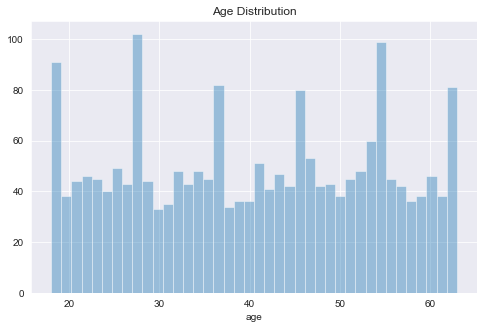

In [67]:
#The Age Distribution Plot
plt.figure(figsize=(8,5))
sns.distplot(df['age'], bins = 40, kde= False)
plt.title('Age Distribution');

Age Distribution of Defaulters and Non-Defaulters.

In [17]:
#Verifying the Default Percentage
percentage_default=round((df['default'].value_counts()/df['default'].count() * 100)).to_frame()
percentage_default

,default
0,86.0
1,14.0


As seen ABOVE, 85% of the Participants Defaulted the Loan Agreement, while 14% did not default

In [89]:
#Filtering out the Defaulters
filt = (df['default'] == 0)
defaulters = df.loc[filt]
defaulters.head()

,clientid,income,age,loan,default
0,1,66155.93,59,8106.53,0
1,2,34415.15,48,6564.75,0
2,3,57317.17,63,8020.95,0
3,4,42709.53,45,6103.64,0
5,6,24904.06,57,15.50,0


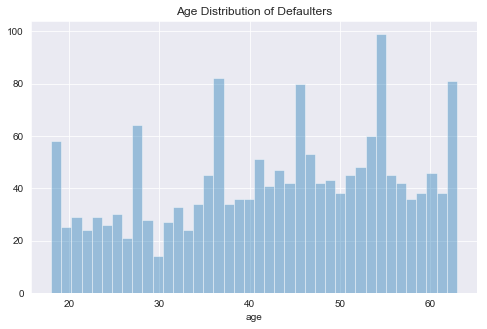

In [90]:
#The Age Distribution Plot of Defaulters
plt.figure(figsize=(8,5))
sns.distplot(defaulters['age'], bins = 40, kde= False)
plt.title('Age Distribution of Defaulters');

In [91]:
#Filtering out the Non-Defaulters
filt = (df['default'] == 1)
non_defaulters = df.loc[filt]
non_defaulters.head()

,clientid,income,age,loan,default
4,5,66952.69,18,8770.10,1
7,8,24500.14,32,2971.00,1
39,40,26578.54,32,3489.84,1
43,44,24381.95,25,4227.02,1
56,57,22248.18,23,4364.98,1


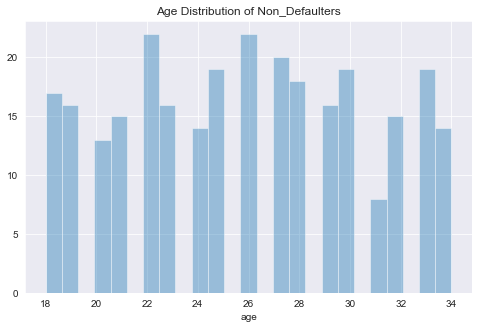

In [94]:
#The Age Distribution Plot of Non_Defaulters
plt.figure(figsize=(8,5))
sns.distplot(non_defaulters['age'], bins = 25, kde= False)
plt.title('Age Distribution of Non_Defaulters');

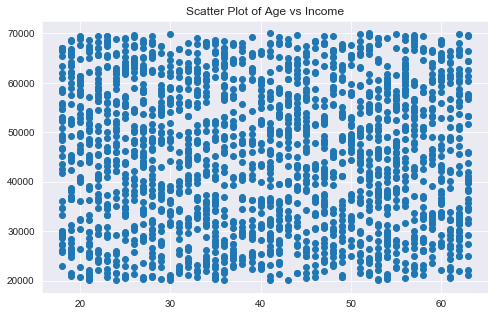

In [70]:
#Scatter plot between age and income
plt.figure(figsize=(8,5))
plt.scatter(x= 'age', y = 'income', data = df)
plt.title('Scatter Plot of Age vs Income');

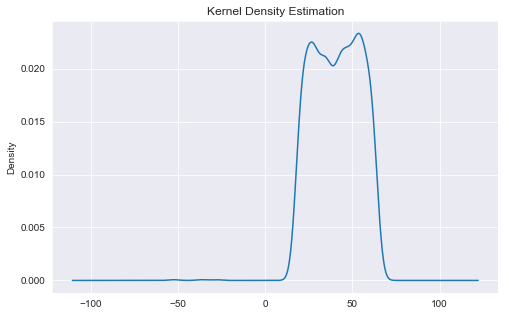

In [65]:
#The KDE Plot
plt.figure(figsize=(8,5))
df_credit['age'].plot(kind = 'kde')
plt.title('Kernel Density Estimation');

In [61]:
#Checking for Correlation between Loan and Income
df[['loan', 'income']].corr()

,loan,income
loan,1.000000,0.441539
income,0.441539,1.000000


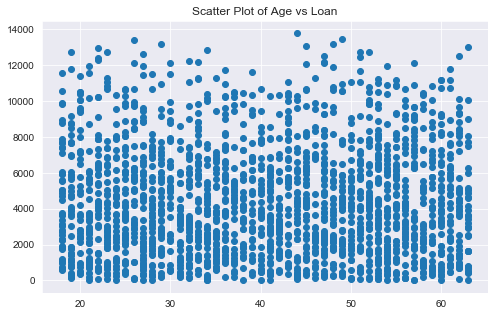

In [69]:
#Scatter plot between age and loan
plt.figure(figsize=(8,5))
plt.scatter(x= 'age', y = 'loan', data = df)
plt.title('Scatter Plot of Age vs Loan');

# Predicting the Default column.

The Preprocessing

In [111]:
#Defining the x and y variables
X = df.drop(['default','clientid'], axis = 1)
y = df['default']

Standerdazing the Independent Variables X

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
#creating a standard scaler object called scaler
scaler = StandardScaler()

In [114]:
#Fit-Transforming the Xvariable into the Standard Scalar
X = scaler.fit_transform(X)
y = y

In [115]:
#Splitting the X and y variables into train and test sections
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Working on the Prediction Model

In [122]:
#Determining the Number of Nearest Neighbore(K)
error_rate = []
for i in range(1,40):
    
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

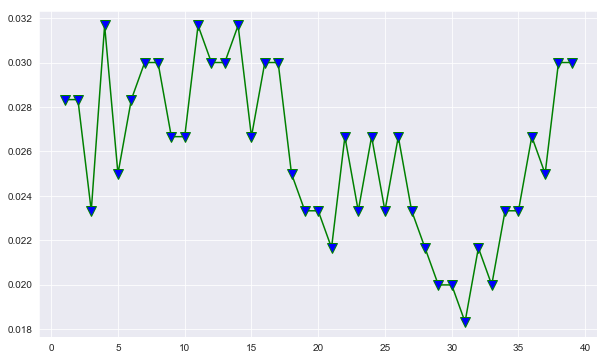

In [170]:
#creeating a plot using the info in the for loop
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='g', linestyle='-', marker ='v', 
         markerfacecolor = 'b', markersize= 10);

In [165]:
#Creating the KNN Variable with 29 Nearest Neighbors as indicated in the above graph
knn = KNeighborsClassifier(n_neighbors= 29)

In [166]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')

In [162]:
y_pred = knn.predict(X_test)

Validating The Model

In [163]:
#Using Confusion Matrix
print(confusion_matrix(y_test, y_pred))
print('\n')
#Using Classification Report
print(classification_report(y_test, y_pred))

[[509   2]
 [ 11  78]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       511
           1       0.97      0.88      0.92        89

   micro avg       0.98      0.98      0.98       600
   macro avg       0.98      0.94      0.96       600
weighted avg       0.98      0.98      0.98       600



In [164]:
#Cross Validation
accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, cv = 10)
#mean of the 10model evaluation
print(accuracies.mean())
print('\n')
#standard deviation of the accuracies vector.
print(accuracies.std())

0.9799634456568483


0.010020770717953584


According to the ABOVE Cross Validation, the Model is 98% accurate with 0.01% of Standard Deviation which are good indications of accurate ML Model